## Time series analysis
The objective of this notebook is predict the IBOV index in 2022 based on the last 3 years.

In [4]:
import warnings
warnings.filterwarnings(action='once')

In [75]:
# I have downloaded the csv file from https://br.investing.com/indices/bovespa-historical-data
import pandas as pd
df_ibov=pd.read_csv('Database/Ibovespa Dados Históricos.csv')
df_ibov.head(15)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,21.01.2022,109.219,109.097,109.786,108.368,"7,24M","0,11%"
1,20.01.2022,109.102,108.015,109.873,108.015,"13,63M","1,01%"
2,19.01.2022,108.013,106.670,108.602,106.669,"12,60M","1,26%"
3,18.01.2022,106.668,106.369,107.013,105.786,"11,22M","0,28%"
4,17.01.2022,106.374,106.927,106.928,106.097,"6,92M","-0,52%"
5,14.01.2022,106.928,105.530,107.062,105.028,"11,46M","1,33%"
6,13.01.2022,105.530,105.686,106.251,104.974,"11,71M","-0,15%"
7,12.01.2022,105.686,103.779,105.869,103.771,"13,03M","1,84%"
8,11.01.2022,103.779,101.946,103.780,101.918,"12,42M","1,80%"
9,10.01.2022,101.945,102.719,102.719,101.038,"10,26M","-0,75%"


In [76]:
#I will only use the column 'último' and Data
df_ibov.drop(['Abertura','Máxima','Mínima','Vol.','Var%'],axis=1,inplace=True)
df_ibov.dtypes

Data       object
Último    float64
dtype: object

In [77]:
df_ibov['Data']=pd.to_datetime(df_ibov['Data'],infer_datetime_format=True)
df_ibov.rename(columns={'Data':'Date','Último':'Price'},inplace=True)

df_ibov.head(15)

,Date,Price
0,2022-01-21,109.219
1,2022-01-20,109.102
2,2022-01-19,108.013
3,2022-01-18,106.668
4,2022-01-17,106.374
5,2022-01-14,106.928
6,2022-01-13,105.530
7,2022-01-12,105.686
8,2022-01-11,103.779
9,2022-01-10,101.945


##  Set the date column to be the index of the entire dataframe
### Beneficts:
1. Query specific times
1. Calculate aggregation functions easily
1. To use the resample method from pandas



In [78]:
df_ibov.set_index('Date',inplace=True)
df_ibov.sort_index(inplace=True)
df_ibov.head(20)

,Price
Date,
2019-01-02,91.012
2019-01-03,91.564
2019-01-04,91.841
2019-01-07,91.699
2019-01-08,92.032
2019-01-09,93.613
2019-01-10,93.806
2019-01-11,93.658
2019-01-14,94.474


In [79]:
df_ibov['Price'].loc['2022']

Date
2022-01-03    103.922
2022-01-04    103.514
2022-01-05    101.006
2022-01-06    101.561
2022-01-07    102.719
2022-01-10    101.945
2022-01-11    103.779
2022-01-12    105.686
2022-01-13    105.530
2022-01-14    106.928
2022-01-17    106.374
2022-01-18    106.668
2022-01-19    108.013
2022-01-20    109.102
2022-01-21    109.219
Name: Price, dtype: float64

In [80]:
df_ibov['Price'].loc['2019'].mean()

100.66030645161291

In [81]:
#check if there is any null values in the dataframe
df_ibov.isnull().sum()

Price    0
dtype: int64

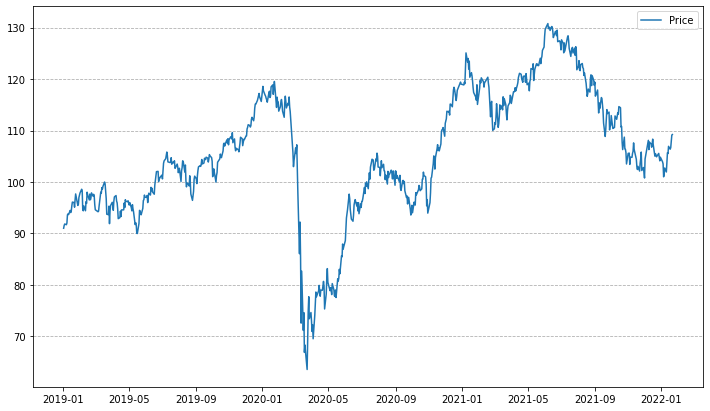

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.plot(df_ibov['Price'],label='Price')
plt.legend()
plt.grid(axis='y',linestyle='--')
plt.show()

## Test the stationarity
1. Use adfuller(Augmented Dickey-Fuller)
1. 'Ho' defines the dataframe being not stationary
1. 'H1' defines the dataframe being stationary(p-value<=0,05)

In [83]:
from statsmodels.tsa.stattools import adfuller
if adfuller(df_ibov['Price'])[1]<=0.05:
    print(f'The p-value is {adfuller(df_ibov["Price"])[1]}, so the dataframe is stationary.')
else :
    print(f'The p-value is {adfuller(df_ibov["Price"])[1]}, so the dataframe is not stationary.')

The p-value is 0.16549367528270886, so the dataframe is not stationary.


In [84]:
#Find the value d to use in ARIMA model, which transform the dataframe into stationary
for d in range (1,len(df_ibov)):
    if adfuller((df_ibov['Price']-df_ibov['Price'].shift(d)).dropna())[1]<=0.05:
        print('The value d which transforms the dataset into stationary is:{}.'.format(d),
              'The p-value is {}.'.format(adfuller((df_ibov["Price"]-df_ibov["Price"].shift(d)).dropna())[1]))
        break

The value d which transforms the dataset into stationary is:1. The p-value is 5.9298510646989805e-12.


In [85]:
df_ibov['First Difference']=df_ibov['Price']-df_ibov['Price'].shift(1)
df_ibov.head(20)

,Price,First Difference
Date,,
2019-01-02,91.012,NaN
2019-01-03,91.564,0.552
2019-01-04,91.841,0.277
2019-01-07,91.699,-0.142
2019-01-08,92.032,0.333
2019-01-09,93.613,1.581
2019-01-10,93.806,0.193
2019-01-11,93.658,-0.148
2019-01-14,94.474,0.816


C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


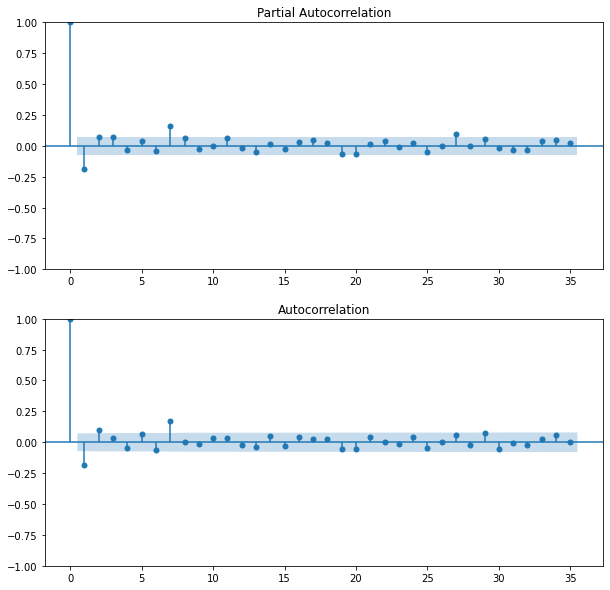

In [86]:
#Find the value p to use in the ARIMA model(Use PACF)
#Find the value q to use in the ARIMA model(Use ACF)
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
fig = plot_pacf(df_ibov['First Difference'].iloc[1:],lags=35,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(df_ibov['First Difference'].iloc[1:],lags=35,ax=ax2)

### I will use p=2,d=1,q=2 in the ARIMA model based on the previous graphs and the ADF test

In [87]:
#Build the model
#separate in 80 % train=607 rows and 20 % test split=152 rows
X_train=df_ibov[['Price']].sort_index().iloc[:607]
X_test=df_ibov[['Price']].sort_index().iloc[607:]
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(X_train,order=(2,1,2)).fit()

C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [88]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  607
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1212.471
Date:                Mon, 24 Jan 2022   AIC                           2434.942
Time:                        11:45:11   BIC                           2456.976
Sample:                             0   HQIC                          2443.516
                                - 607                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0580      0.133      0.436      0.663      -0.203       0.319
ar.L2         -0.4203      0.094     -4.454      0.000      -0.605      -0.235
ma.L1         -0.2200      0.136     -1.614      0.106      -0.487       0.047
ma.L2          0.5411      0.096      5.629      0.000       0.353       0.730
sigma2         3.2012      0.092     34.629      0.000       3.020       3.382
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              3096.10
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

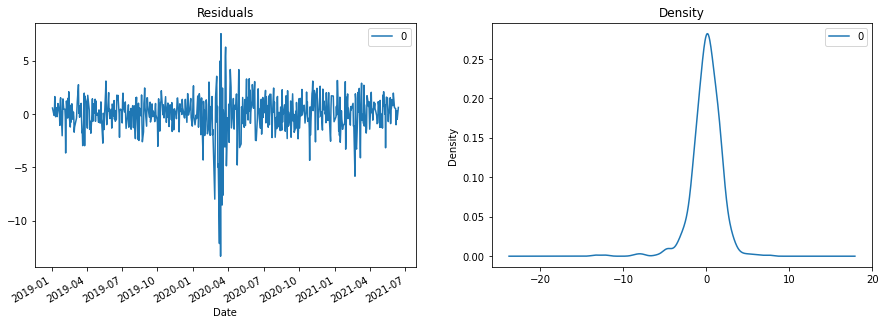

In [89]:
# Plot residual errors
residuals = pd.DataFrame(arima.resid[1:])
fig, ax = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:394: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


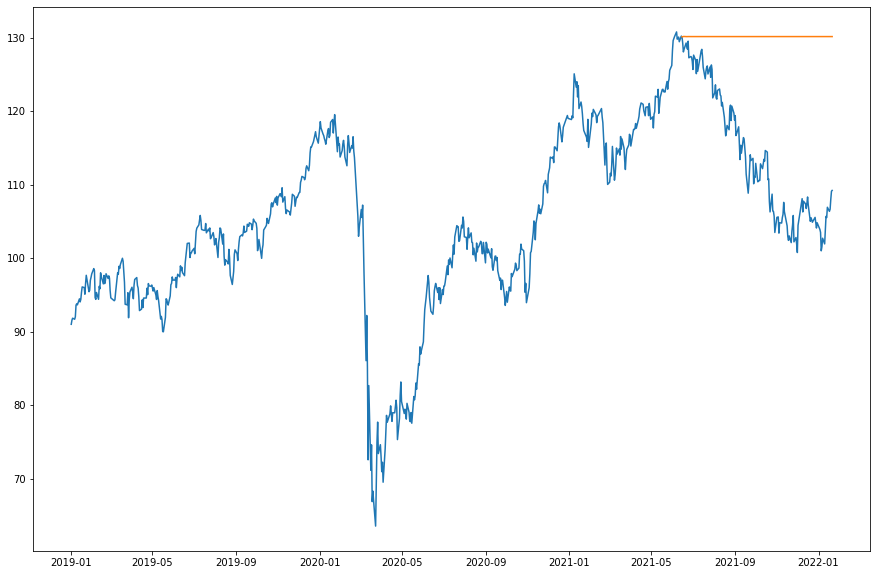

In [90]:
#make prediction and plot
predict=arima.predict(607,758)
predict.index=X_test.index
plt.figure(figsize=(15,10))
plt.plot(df_ibov['Price'])
plt.plot(predict)
plt.show()

In [109]:
#Now I will use random forest to predict the IBOV in 2022 using two lags like featuresb
df_ibov_lag2=df_ibov.drop('First Difference',axis=1).copy()
df_ibov_lag2['T-1']=df_ibov_lag2['Price'].shift(1)
df_ibov_lag2['T-2']=df_ibov_lag2['Price'].shift(2)
df_ibov_lag2.dropna(axis=0,inplace=True)

In [115]:
#separate in train test split
X_train=df_ibov_lag2[['T-1','T-2']].iloc[:605]
X_test=df_ibov_lag2[['T-1','T-2']].iloc[605:756]
y_train=df_ibov_lag2['Price'].iloc[:605]
y_test=df_ibov_lag2['Price'].iloc[605:]

In [116]:
#Build the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=5)
rf.fit(X_train,y_train)
predict_y=rf.predict(X_test)

In [117]:
pd.concat([y_test,predict],axis=1)

,Price,predicted_mean
Date,,
2021-06-15,130.091,130.109909
2021-06-16,129.259,130.110737
2021-06-17,128.057,130.152010
2021-06-18,128.405,130.154055
2021-06-21,129.265,130.136828
...,...,...
2022-01-17,106.374,130.140778
2022-01-18,106.668,130.140778
2022-01-19,108.013,130.140778


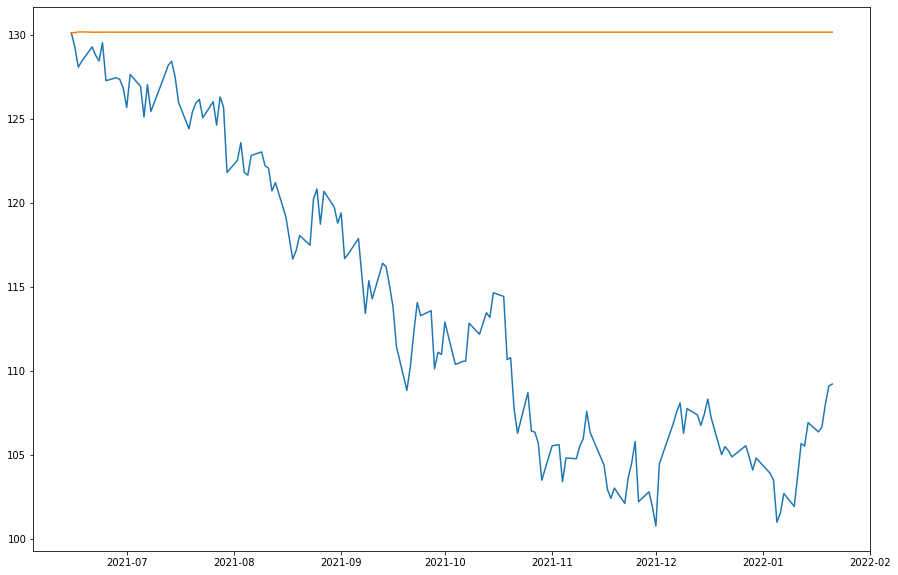

In [118]:
plt.figure(figsize=(15,10))
plt.plot(y_test)
plt.plot(predict)
plt.show()

# The arima model and random forest predicted the same values